# Machine learning for medicine: Project
### Mohamed Ruine & Romain Chor
## Dataset : Drugs consumption (quantified)
Link: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29  
Reference: "The Five Factor Model of personality and evaluation of drug consumption risk.,", E. Fehrman, A. K. Muhammad, E. M. Mirkes, V. Egan and A. N. Gorban, 2015

We have decided to study a dataset containing enough examples to conduct proper analysis, interesting features and giving interesting subjects of interest.  

The aim is to use personal and personnality information gathered on 1885 respondants to predict a given drug consumption.  
More precisely, there are 18 legal and illegal drugs including a fictitious drug. These variables originally contain seven classes corresponding to: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".

In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys 
sys.path.append('C:\\Users\\cnrom\\Desktop\\Python\\modules') #to use datascience module
from datascience import *
sns.set()


Machine learning module 
Author: Romain Chor

Packages:
	numpy as np
	pandas as pd
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	missing_val
    nan_filling
	rmse
    filling_season
    train_test_base
    train_test_random
    train_test_cv
    blending_cv
    plot_confusion_matrix



In [2]:
names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore',
         'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 
         'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

df = pd.read_csv("drug_consumption.data", delimiter=",", header=None, names=names)
print(df.shape)
df.head()

(1885, 32)


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Note that all input features (except drug features) were quantified, which means that they can be considered as real-valued.

## Data exploration

In [3]:
# df.info()
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [4]:
missing_val(df)

Empty DataFrame
Columns: [Total, Percentage]
Index: []


**Apparently no missing values**

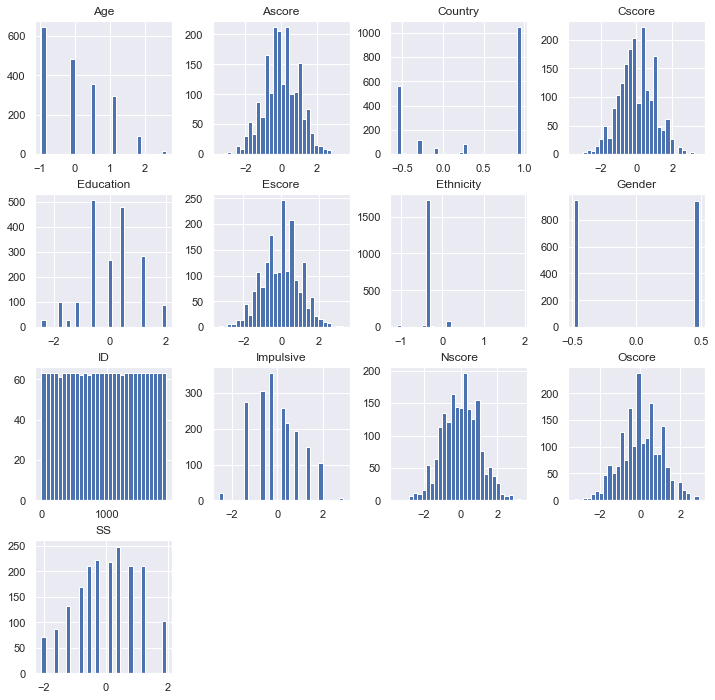

In [5]:
df.iloc[:, :13].hist(figsize=(12, 12), bins=30);

Personnality scores basically have gaussian distributions. Note that they are already standardized.

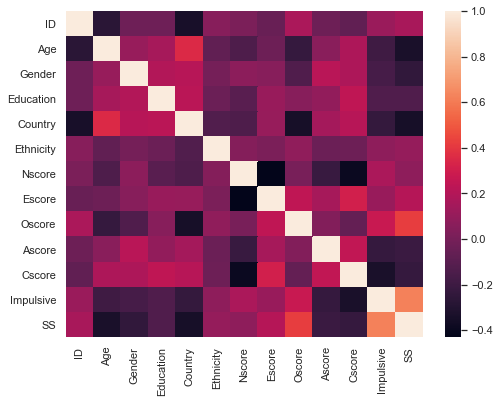

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr());

No particular correlation between features except "Impulsive" with "SS".

### Target(s)

**IMPORTANT: We are "binarizing" classes for each drug to obtain a binary classification problem. For this, we consider that "Never Used" and "Used over a Decade Ago" form the class of non-users while "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day" form the class of users.**

In [7]:
#"Binarizing" classes for each drug
df = df.replace(['CL0', 'CL1'], 0)
df = df.replace(['CL2', 'CL3', 'CL4', 'CL5', 'CL6'], 1)

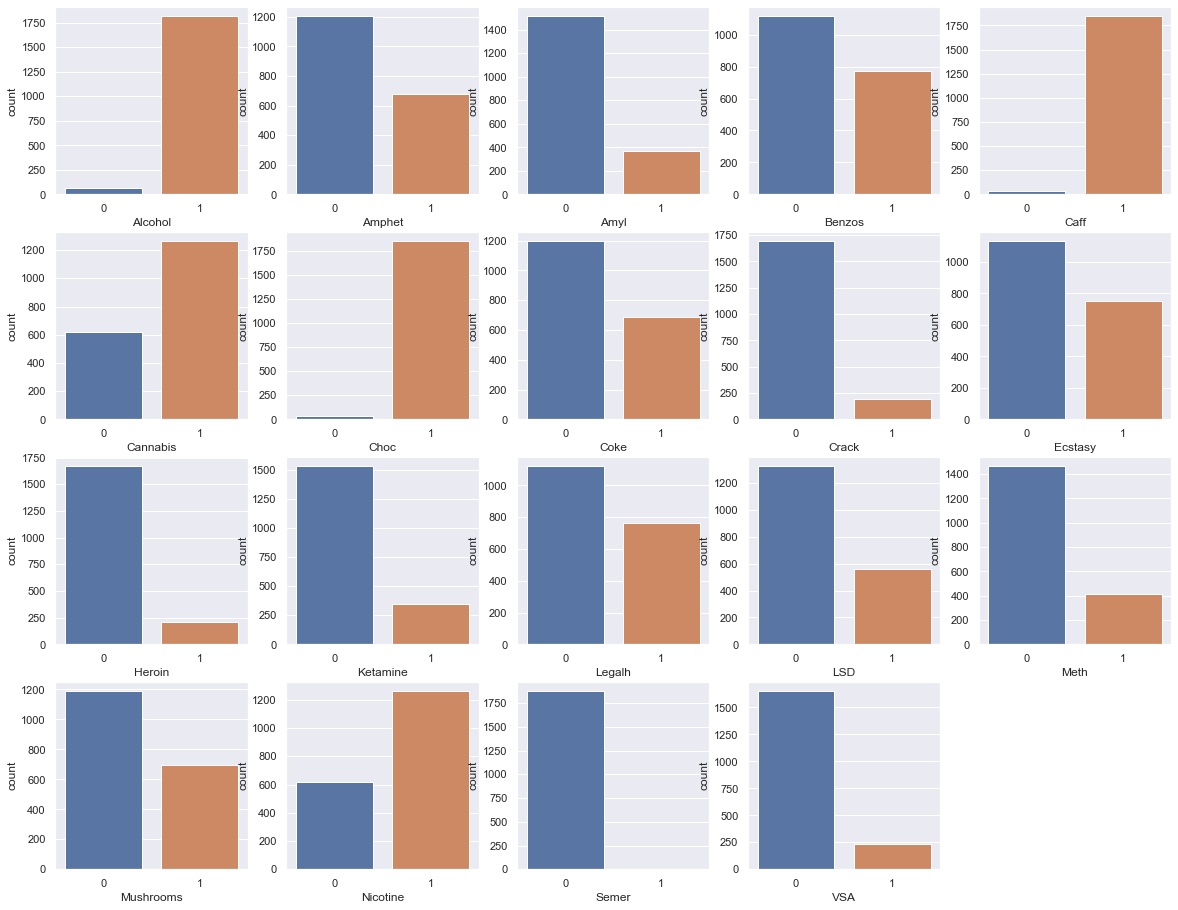

In [8]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 
         'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

plt.figure(figsize=(20, 20))
for i, c in enumerate(drugs):
    plt.subplot(5, 5, i+1)
    sns.countplot(c, data=df)

Some drugs have particularly unbalanced distributions such as "Heroin" and "Crack". Treating them require special techniques such as resampling (oversampling and undersampling).  
Note that "Alcohol", "Caffeine" and "Chocolate" contain naturally few "0" labels.

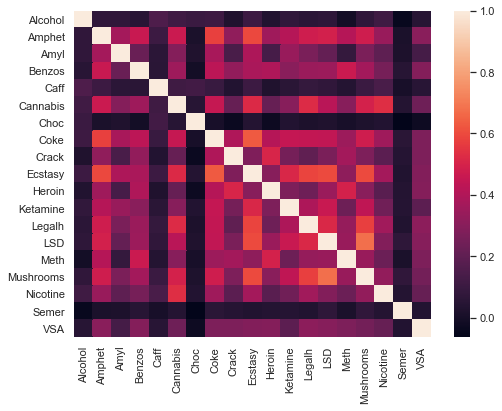

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[drugs].corr());

One can observe that some drugs are quite correlated to each other. This means that a person consuming a drug A is likely to consume a drug B as well. A study using only drugs as features can be conducted but this is out of our subject of interest.

## Picking target and testing models

One way to make predictive modelling is to use all available features. This way we are able to exploit correlations between the different drugs consumption. However let us first try to predict without these information. It is possible to consider multiple drugs from strongly unbalanced to highly balanced distribution.

In [12]:
def prepare_data(df, drug, drug_info=False):
    """Prepares data with 'drug' as target and with other drugs as features (or not, no by Default)"""
    others = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 
         'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
    others.remove(drug)
     
    target = df[drug].values
    data = df.drop(['ID', drug], axis=1)
    if not(drug_info): data = data.drop(others, axis=1)
    
    return data, target

After observing features distributions, we might want to consider some as categorical and some as continuous (high number of unique values).

In [13]:
cat = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity'] 
cont = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS'] 

**We will focus on LSD drug as its distribution is neither unbalanced nor too balanced.**

In [14]:
#The drug to predict
drug = 'LSD'
data, target = prepare_data(df, drug)

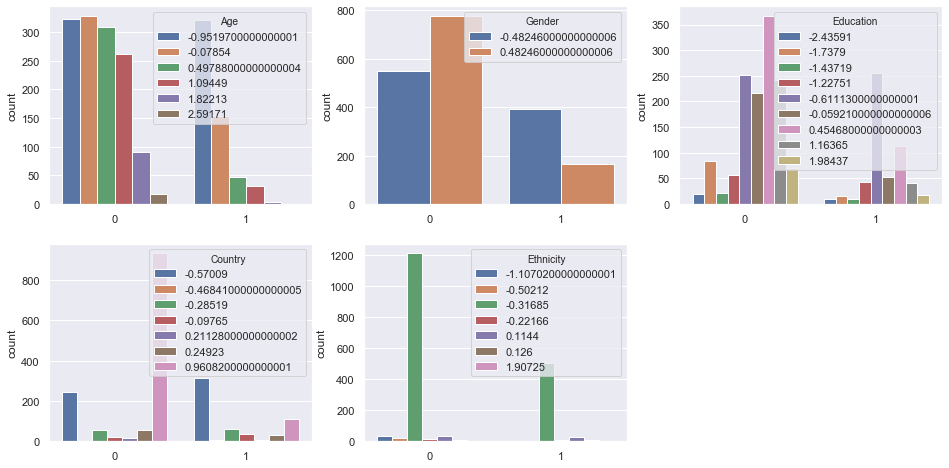

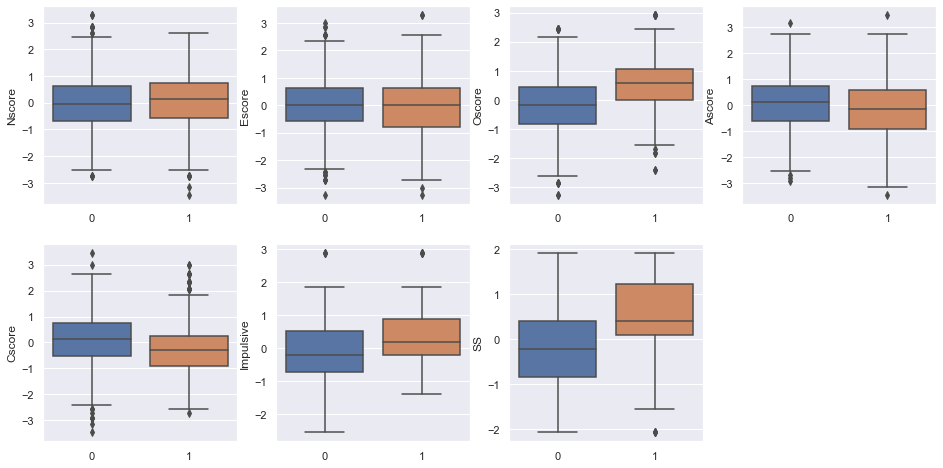

In [15]:
plt.figure(figsize=(16, 8))
for i, c in enumerate(cat):
    plt.subplot(2, 3, i+1)
    sns.countplot(target, hue=data[c])

plt.figure(figsize=(16, 8))
for i, c in enumerate(cont):
    plt.subplot(2, 4, i+1)
    sns.boxplot(target, data[c])

Countplots show that distributions of the 'categorical' features are different depending on the target. However we do not observe different distributions for 'continuous' features.

### Bayes Net for vizualisation 

In [64]:
sys.path.append('C:\\Users\\cnrom\\Anaconda3\\Library\\bin\\graphviz') #To use graphviz

In [65]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn2graph as bnPlot

In [109]:
drug = 'LSD'
data = df.iloc[:, 1:13].join(df[drug])
drug, data = 'all', df.copy() #run on ALL drugs

#Discretization
n_bins = 5
l = []
for col in data.columns.values:
    bins = np.linspace(min(data[col]), max(data[col]), n_bins)
    l.append(pd.DataFrame(np.digitize(data[col], bins),columns=[col]))
discr_data=pd.concat(l, join='outer', axis=1)
discr_data.to_csv("discr_"+drug+".csv", index=False)

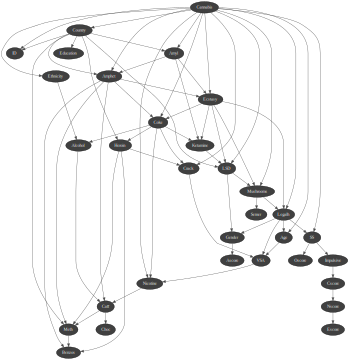

In [110]:
#learn w/ LocalSearchWithTabuList
learner = gum.BNLearner("discr_"+drug+".csv")
learner.useLocalSearchWithTabuList()
bn=learner.learnBN()
gnb.showBN(bn)
#bnPlot.dotize(bn, "discr_"+drug+"_"+"LocalSearch", format='pdf') #to export to pdf

# learner = gum.BNLearner("discr_"+drug+".csv")
# learner.useGreedyHillClimbing()
# bn = learner.learnBN()
# gnb.showBN(bn)

### Cross-validation benchmark

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score

seed = 117
#TRAIN and TEST sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target, random_state=seed)
X_train.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
315,0.49788,-0.48246,0.45468,0.96082,-1.10702,-0.79151,1.93886,-0.97631,-0.01729,1.13407,-0.71126,-0.52593
52,1.82213,0.48246,0.45468,0.96082,-0.31685,-0.14882,0.00332,-1.42424,0.28783,-0.78155,0.52975,-1.54858
1668,1.82213,-0.48246,0.45468,0.96082,-0.31685,0.62967,-0.43999,1.24033,0.94156,-1.13788,-0.71126,-0.21575
1720,1.82213,-0.48246,-0.05921,0.96082,-0.31685,-2.05048,-0.15487,-1.42424,0.59042,0.41594,-0.21712,-0.84637
1613,-0.07854,-0.48246,1.16365,0.96082,-0.31685,0.52135,0.00332,0.72330,0.59042,-0.27607,0.88113,1.92173


Note that we will use [Sklearn's ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) metric to evaluate our models. For classification of imbalanced targets, accuracy score performs poorly and does not help distinguish models performances.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

models = {'LR':LogisticRegression(), 
          'SVM':SVC(), 
          'KNN':KNeighborsClassifier(),
          'RF':RandomForestClassifier(),
          'ExT':ExtraTreesClassifier(),
          'GB':GradientBoostingClassifier(),
          'XGB':XGBClassifier(),
          'LGBM':LGBMClassifier()}
scores = train_test_cv(X_train, y_train, models, metric='roc_auc', cv=5)
display(scores)
scores.to_csv('5fold-'+drug+'.csv', sep=' ') #Save scores

,LR,SVM,KNN,RF,ExT,GB,XGB,LGBM
0,0.875033,0.862847,0.809490,0.844912,0.853880,0.858153,0.856254,0.835575
1,0.853563,0.846969,0.794772,0.834758,0.836208,0.838266,0.841325,0.832041
2,0.847222,0.847065,0.822484,0.847013,0.852699,0.839570,0.835535,0.823008
3,0.870787,0.858491,0.829659,0.848659,0.844181,0.856954,0.861512,0.833369
4,0.860505,0.849269,0.817866,0.855125,0.852555,0.866123,0.868349,0.836178
Mean score,0.861422,0.852928,0.814854,0.846093,0.847904,0.851813,0.852595,0.832034
Std,0.010365,0.006521,0.011988,0.006617,0.006797,0.010998,0.012322,0.004753
Training time,1.435427,0.989927,0.878650,0.260418,0.202462,0.210268,0.915380,0.338062


## Further features engineering

### Standardization

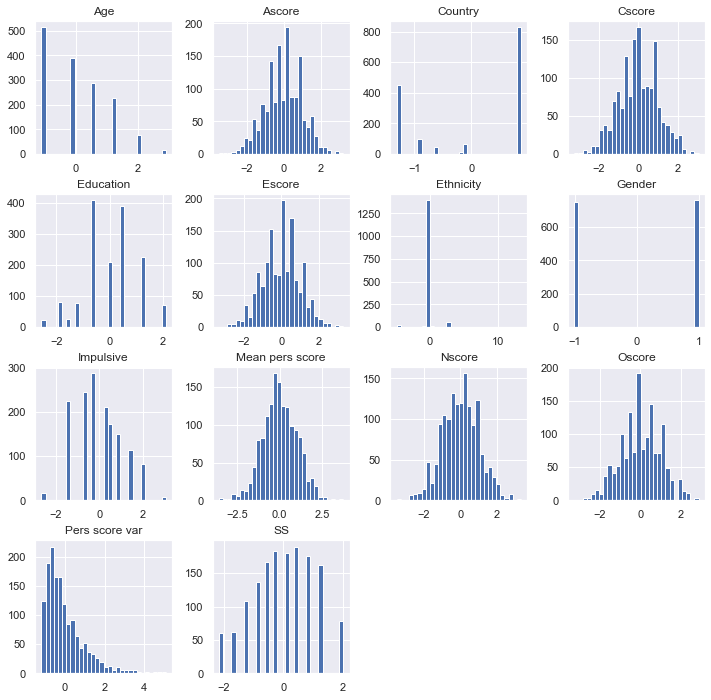

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_norm = pd.DataFrame(X_norm, columns=X_train.columns)
X_norm.hist(bins=30, figsize=(12, 12));

In [35]:
scores = train_test_cv(X_norm, y_train, models, metric='roc_auc', cv=5)
display(scores)

,LR,SVM,KNN,RF,ExT,GB,XGB,LGBM
0,0.874664,0.862478,0.838688,0.859630,0.850768,0.858205,0.856254,0.848446
1,0.853511,0.834995,0.784723,0.835496,0.829061,0.839057,0.841325,0.831408
2,0.847484,0.844392,0.808150,0.853538,0.846882,0.836635,0.835535,0.826048
3,0.870257,0.853827,0.851468,0.849693,0.849746,0.857908,0.861512,0.839358
4,0.860028,0.832998,0.807690,0.865805,0.845718,0.865911,0.868349,0.831620
Mean score,0.861189,0.845738,0.818144,0.852832,0.844435,0.851543,0.852595,0.835376
Std,0.010118,0.011182,0.023911,0.010251,0.007903,0.011571,0.012322,0.007792
Training time,0.021911,0.925982,0.047838,0.336368,0.918315,1.059141,1.024212,0.536465


Standardization seems to degrade performances.

### Number of drugs consumed feature (only if other drugs info is available)

In [36]:
# X_train['Drugs count'] = np.sum(X_train[others], axis=1)
# X_train.head()

In [37]:
# scores = train_test_cv(X_train, y_train, models, metric='roc_auc', cv=5)
# display(scores)

### Mean personnality score

In [38]:
X_train['Mean pers score'] = np.mean(X_train[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)
X_test['Mean pers score'] = np.mean(X_test[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)
X_train.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Mean pers score,Pers score var
315,0.49788,-0.48246,0.45468,0.96082,-1.10702,-0.79151,1.93886,-0.97631,-0.01729,1.13407,-0.71126,-0.52593,0.257564,1.258713
52,1.82213,0.48246,0.45468,0.96082,-0.31685,-0.14882,0.00332,-1.42424,0.28783,-0.78155,0.52975,-1.54858,-0.412692,0.378542
1668,1.82213,-0.48246,0.45468,0.96082,-0.31685,0.62967,-0.43999,1.24033,0.94156,-1.13788,-0.71126,-0.21575,0.246738,0.801080
1720,1.82213,-0.48246,-0.05921,0.96082,-0.31685,-2.05048,-0.15487,-1.42424,0.59042,0.41594,-0.21712,-0.84637,-0.524646,1.080449
1613,-0.07854,-0.48246,1.16365,0.96082,-0.31685,0.52135,0.00332,0.72330,0.59042,-0.27607,0.88113,1.92173,0.312464,0.146324


In [39]:
scores = train_test_cv(X_train, y_train, models, metric='roc_auc', cv=5)
display(scores)

,LR,SVM,KNN,RF,ExT,GB,XGB,LGBM
0,0.875033,0.862847,0.809490,0.843910,0.854355,0.858575,0.856254,0.835575
1,0.853563,0.846969,0.794772,0.835945,0.837685,0.838424,0.841325,0.832041
2,0.847222,0.847065,0.822484,0.849843,0.860482,0.838050,0.835535,0.823008
3,0.870787,0.858491,0.829659,0.855019,0.857351,0.856636,0.861512,0.833369
4,0.860505,0.849269,0.817866,0.865328,0.852926,0.866070,0.868349,0.836178
Mean score,0.861422,0.852928,0.814854,0.850009,0.852560,0.851551,0.852595,0.832034
Std,0.010365,0.006521,0.011988,0.009948,0.007878,0.011319,0.012322,0.004753
Training time,0.928019,0.052859,0.881393,0.248283,0.167552,0.212432,0.809272,0.121683


### Variance of personnality scores 

In [40]:
X_train['Pers score var'] = np.var(X_train[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)
X_test['Pers score var'] = np.var(X_test[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)
X_train.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Mean pers score,Pers score var
315,0.49788,-0.48246,0.45468,0.96082,-1.10702,-0.79151,1.93886,-0.97631,-0.01729,1.13407,-0.71126,-0.52593,0.257564,1.258713
52,1.82213,0.48246,0.45468,0.96082,-0.31685,-0.14882,0.00332,-1.42424,0.28783,-0.78155,0.52975,-1.54858,-0.412692,0.378542
1668,1.82213,-0.48246,0.45468,0.96082,-0.31685,0.62967,-0.43999,1.24033,0.94156,-1.13788,-0.71126,-0.21575,0.246738,0.801080
1720,1.82213,-0.48246,-0.05921,0.96082,-0.31685,-2.05048,-0.15487,-1.42424,0.59042,0.41594,-0.21712,-0.84637,-0.524646,1.080449
1613,-0.07854,-0.48246,1.16365,0.96082,-0.31685,0.52135,0.00332,0.72330,0.59042,-0.27607,0.88113,1.92173,0.312464,0.146324


In [41]:
scores = train_test_cv(X_train, y_train, models, metric='roc_auc', cv=5)
display(scores)

,LR,SVM,KNN,RF,ExT,GB,XGB,LGBM
0,0.875033,0.862847,0.809490,0.839874,0.863296,0.858311,0.856254,0.835575
1,0.853563,0.846969,0.794772,0.833834,0.832146,0.837949,0.841325,0.832041
2,0.847222,0.847065,0.822484,0.853381,0.853616,0.836321,0.835535,0.823008
3,0.870787,0.858491,0.829659,0.850037,0.852661,0.856530,0.861512,0.833369
4,0.860505,0.849269,0.817866,0.870018,0.843704,0.865858,0.868349,0.836178
Mean score,0.861422,0.852928,0.814854,0.849429,0.849085,0.850994,0.852595,0.832034
Std,0.010365,0.006521,0.011988,0.012445,0.010499,0.011752,0.012322,0.004753
Training time,0.025901,0.535562,0.216386,1.032418,1.027919,1.052937,1.006704,0.556003


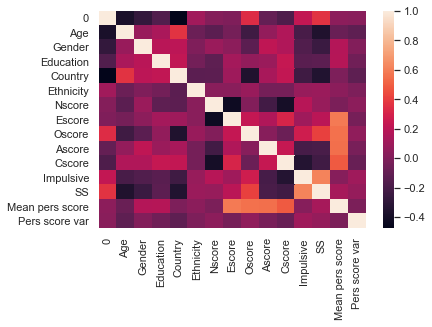

In [42]:
sns.heatmap(pd.concat([pd.Series(target), X_train], axis=1).corr())

Mean pers score moderately correlated with pers scores. This means that it brings a redundant information which was expected since it carries the information of Nscore, Escore, Oscore, Ascore and Cscore. In the other side, the variance of personnality scores seems to bring an additionnal information. We will keep those 2 features for the following.

## NN

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, GaussianDropout
from keras.callbacks.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC

m = X_train.shape[1]

#Simple one hidden layer NN
nn = Sequential()
nn.add(Dense(10, input_shape=(m, )))
nn.add(GaussianDropout(0.2)) #regularization
nn.add(Dense(50, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()])

In [44]:
history = nn.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size=10, 
                 callbacks=[EarlyStopping(restore_best_weights=True)])

Train on 1055 samples, validate on 453 samples
Epoch 1/10
1055/1055 [==============================] - 1s 486us/step - loss: 0.5120 - auc_4: 0.7337 - val_loss: 0.4753 - val_auc_4: 0.7839
Epoch 2/10
1055/1055 [==============================] - 0s 111us/step - loss: 0.4336 - auc_4: 0.8039 - val_loss: 0.4524 - val_auc_4: 0.8137
Epoch 3/10
1055/1055 [==============================] - 0s 114us/step - loss: 0.4126 - auc_4: 0.8223 - val_loss: 0.4491 - val_auc_4: 0.8280
Epoch 4/10
1055/1055 [==============================] - 0s 112us/step - loss: 0.4244 - auc_4: 0.8315 - val_loss: 0.4480 - val_auc_4: 0.8330
Epoch 5/10
1055/1055 [==============================] - 0s 112us/step - loss: 0.4180 - auc_4: 0.8357 - val_loss: 0.4470 - val_auc_4: 0.8370
Epoch 6/10
1055/1055 [==============================] - 0s 112us/step - loss: 0.4107 - auc_4: 0.8388 - val_loss: 0.4464 - val_auc_4: 0.8404
Epoch 7/10
1055/1055 [==============================] - 0s 113us/step - loss: 0.4000 - auc_4: 0.8422 - val_loss: 

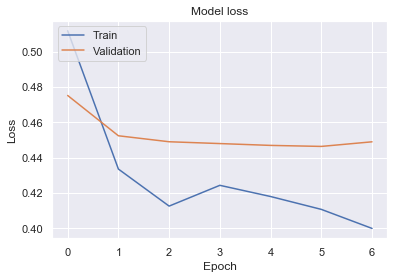

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Note that neural networks in our case are vere prone to overfitting. We can indeed observe that when the NN has too many layers or too many neurons per layer, validation loss increases while training loss decreases. The dropout layer helps prevent overfitting.  
This explains the difficulty to obtain better performances than classical Machine learning models.

## Models aggregation

### Blending

Models blending consists in using multiple models to predict a target then getting the mean of those predictions.

In [48]:
from sklearn.model_selection import KFold

def blending_cv(models, X, y, cv=5):
    """
    Performs K-folds cross-validated models blending and returns scores on each fold.
    models: dict with model name as key and Sklearn model instance as value
    X: pandas Dataframe
    y: numpy array
    cv: number of folds
    """
    kf = KFold(n_splits=cv)
    scores = []
    i = 0
    for train_index, val_index in kf.split(X):
        X_tr, X_val = X.iloc[train_index, :], X.iloc[val_index, :]
        y_tr, y_val = y[train_index], y[val_index]
        y_pred = 0
        for __, model in models.items():
            model.fit(X_tr, y_tr)
            y_pred += model.predict_proba(X_val)[:, 1]
        y_pred /= cv
        scores.append(roc_auc_score(y_val, y_pred))
        i += 1
    scores.append(np.mean(scores))
    scores = pd.DataFrame(scores, columns=['Score']).rename(index={5:'Mean score'})
    
    return scores

In [49]:
models = {'LR':LogisticRegression(), 
          'RF':RandomForestClassifier(),
          'GB':GradientBoostingClassifier(),
          'XGB':XGBClassifier()}
blending_cv(models, X_train, y_train)

,Score
0,0.862559
1,0.853758
2,0.846344
3,0.872752
4,0.874911
Mean score,0.862065


With this combination of models, blending performs better than all single models. 

### Stacking

Stacking is a models aggregation method. It consists in two levels:
- First level: using multiple good predictive models to predict targets
- Second level: Using those predictions combined as input features of a new model

In [51]:
from sklearn.ensemble import StackingClassifier

models = [('LR', LogisticRegression()), ('RF', RandomForestClassifier()), ('GB', GradientBoostingClassifier())]
stk = StackingClassifier(models, XGBClassifier(), stack_method='predict_proba')

scores = cross_val_score(stk, X_train, y_train, cv=5, scoring='roc_auc')
print("Scores : ", scores)
print("Mean CV score : {0:2f} (+/- {1:2f})".format(np.mean(scores), np.std(scores)))

Scores :  [0.8670412  0.83230469 0.84523061 0.85846407 0.85594658]
Mean CV score : 0.851797 (+/- 0.011976)


Stacking does not seem to improve perfomances. However, this method requires meticulous choice of the first layer models. In particular one should make sure that first layer predictions are not too highly correlated.

## Clustering

In [53]:
def test_clustering(X, labels, models, metric, display=False):
    """
    labels: true classes labels (if available)
    models: dict of clustering models with name of the model as key and sklearn object as value
    metric: a clustering metric with the form f(labels_true, labels_pred)
    display: whether to print each score or not
    """
    results = []
    for name, clt in models.items():
        clt.fit(X)
        if labels is not None: score = metric(labels_true=labels, labels_pred=clt.labels_)
        else: score = metric(X=X, labels=clt.labels_)
            
        if display: print("Score ({0:s}): {1:2f}".format(name, score))    
        results.append(score)
        
    return results

In [54]:
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score

k = 2 #true number of classes
models = {"KMeans":KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1),
         "Agg clt (ward)":AgglomerativeClustering(linkage='ward', n_clusters=k),
         "Agg clt (average)":AgglomerativeClustering(linkage='average', n_clusters=k),
         "Agg clt (complete)":AgglomerativeClustering(linkage='complete', n_clusters=k),
         "Spec clt":SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors"),
         "DBSCAN":DBSCAN(eps=0.5, min_samples=5, metric='euclidean'),
          "Affinity prop":AffinityPropagation(max_iter=300, affinity='euclidean')
         }

metrics = {'Homogeneity':homogeneity_score,
           'Completeness':completeness_score,
           'V measure':v_measure_score,
           'Adjusted Rand':adjusted_rand_score
          }


scores_df = pd.DataFrame()
for name, metric in metrics.items():
    scores_df[name] = test_clustering(X=X_train, labels=y_train, models=models, metric=metric)
scores_df['Average score'] = np.mean(scores_df, axis=1)
scores_df.index = list(models.keys())

In [55]:
scores_df

,Homogeneity,Completeness,V measure,Adjusted Rand,Average score
KMeans,0.162793,0.142679,0.149889,0.161995,0.154339
Agg clt (ward),0.139144,0.122513,0.130300,0.104046,0.124001
Agg clt (average),0.000200,0.011989,0.000393,0.001056,0.003409
Agg clt (complete),0.005158,0.005555,0.005349,0.030652,0.011678
Spec clt,0.203903,0.179476,0.190911,0.222903,0.199298
DBSCAN,0.000000,1.000000,0.000000,0.000000,0.250000
Affinity prop,0.317412,0.043025,0.075778,0.005208,0.110356


Even if we choose clustering methods reacting to many different [use cases](https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods), we still get very poor results, which could indicate that our dataset has no particular shape regarding to the features space.

### Decision trees (TP1)

## About dimensionality reduction

Since the number of features at hand is not very high for our drug dataset, [PCA](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca), as other dimensionality reduction methods, have only a harmful effect. Thus, applying no dimensionality reduction technique remains the best solution.

## Benchmark (on test set)

In this final part, we will evaluate all the suitable models introduced above on our test set.  

In [72]:
from time import time
from sklearn.metrics import roc_auc_score

drug = 'LSD'
data, target = prepare_data(df, drug)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target, random_state=seed)
X_train.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
315,0.49788,-0.48246,0.45468,0.96082,-1.10702,-0.79151,1.93886,-0.97631,-0.01729,1.13407,-0.71126,-0.52593
52,1.82213,0.48246,0.45468,0.96082,-0.31685,-0.14882,0.00332,-1.42424,0.28783,-0.78155,0.52975,-1.54858
1668,1.82213,-0.48246,0.45468,0.96082,-0.31685,0.62967,-0.43999,1.24033,0.94156,-1.13788,-0.71126,-0.21575
1720,1.82213,-0.48246,-0.05921,0.96082,-0.31685,-2.05048,-0.15487,-1.42424,0.59042,0.41594,-0.21712,-0.84637
1613,-0.07854,-0.48246,1.16365,0.96082,-0.31685,0.52135,0.00332,0.72330,0.59042,-0.27607,0.88113,1.92173


In [73]:
X_train['Mean pers score'] = np.mean(X_train[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)
X_test['Mean pers score'] = np.mean(X_test[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)

X_train['Pers score var'] = np.var(X_train[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)
X_test['Pers score var'] = np.var(X_test[['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']], axis=1)

In [74]:
######## Classical ML models ########
models = {'LR':LogisticRegression(), 
          'KNN':KNeighborsClassifier(),
          'RF':RandomForestClassifier(),
          'ExT':ExtraTreesClassifier(),
          'GB':GradientBoostingClassifier(),
          'XGB':XGBClassifier(),
          'LGBM':LGBMClassifier()}
benchmark = train_test_base(X_train, X_test, y_train, y_test, models, metric=roc_auc_score)
benchmark

,LR,KNN,RF,ExT,GB,XGB,LGBM
Score,0.816331,0.777552,0.819430,0.821700,0.824020,0.820937,0.797975
Training time,0.004987,0.003988,0.241683,0.144134,0.219686,0.124579,0.075800


In [75]:
######## Blending ########
models = {'LR':LogisticRegression(), 
          'RF':RandomForestClassifier(),
          'GB':GradientBoostingClassifier(),
          'XGB':XGBClassifier()}

y_pred = 0
start = time()
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred += model.predict_proba(X_test)[:, 1]
y_pred /= len(models)
end = time()

score = roc_auc_score(y_test, y_pred)
benchmark['Blending'] = [score, end-start]

In [76]:
######## Stacking ########
from sklearn.ensemble import StackingClassifier

stk_models = [('LR', LogisticRegression()), 
              ('RF', RandomForestClassifier()), 
              ('ExT', ExtraTreesClassifier()),
              ('GB', GradientBoostingClassifier())]
stk = StackingClassifier(stk_models, XGBClassifier(), stack_method='predict_proba')

start = time()
stk.fit(X_train, y_train)
end = time()

score = roc_auc_score(y_test, stk.predict_proba(X_test)[:, 1])
benchmark['Stacking'] = [score, end-start]

In [77]:
######## Neural networks ########
m = X_train.shape[1]

#Simple one hidden layer NN
nn = Sequential()
nn.add(Dense(10, input_shape=(m, )))
nn.add(GaussianDropout(0.2)) #regularization
nn.add(Dense(50, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()])

In [78]:
start = time()
history = nn.fit(X_train, y_train, epochs=10, validation_split=0.3, batch_size=10, 
                 callbacks=[EarlyStopping(restore_best_weights=True)])
end = time()

Train on 1055 samples, validate on 453 samples
Epoch 1/10
1055/1055 [==============================] - 1s 497us/step - loss: 0.5558 - auc_6: 0.5892 - val_loss: 0.5048 - val_auc_6: 0.7207
Epoch 2/10
1055/1055 [==============================] - 0s 130us/step - loss: 0.4417 - auc_6: 0.7575 - val_loss: 0.4761 - val_auc_6: 0.7829
Epoch 3/10
1055/1055 [==============================] - 0s 112us/step - loss: 0.4184 - auc_6: 0.7974 - val_loss: 0.4673 - val_auc_6: 0.8072
Epoch 4/10
1055/1055 [==============================] - 0s 110us/step - loss: 0.4116 - auc_6: 0.8142 - val_loss: 0.4635 - val_auc_6: 0.8194
Epoch 5/10
1055/1055 [==============================] - 0s 106us/step - loss: 0.4023 - auc_6: 0.8245 - val_loss: 0.4655 - val_auc_6: 0.8273


In [ ]:
# score = nn.evaluate(X_test, y_test)[1]
# print(score)

score = roc_auc_score(y_test, nn.predict(X_test))
benchmark['NN'] = [score, end-start]

For some reason, [Keras ROC AUC](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/AUC) metric does not provide same results as [Sklearn's one](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). This explains the difference between what 'evaluate' returns and what we obtain by manually calculating the ROC AUC score from the predictions. We will stand with Sklearn's score for comparison with other models.  

In [80]:
benchmark

,LR,KNN,RF,ExT,GB,XGB,LGBM,Blending,Stacking,NN
Score,0.816331,0.777552,0.819430,0.821700,0.824020,0.820937,0.797975,0.826052,0.808491,0.806950
Training time,0.004987,0.003988,0.241683,0.144134,0.219686,0.124579,0.075800,0.587501,3.169509,1.473582


### Benchmark using all drugs features

Let us see what happens when trying to predict our LSD target using all other drugs features.

In [82]:
drug = 'LSD'
data, target = prepare_data(df, drug, drug_info=True)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target, random_state=seed)

models = {'LR':LogisticRegression(), 
          'KNN':KNeighborsClassifier(),
          'RF':RandomForestClassifier(),
          'ExT':ExtraTreesClassifier(),
          'GB':GradientBoostingClassifier(),
          'XGB':XGBClassifier(),
          'LGBM':LGBMClassifier()}
train_test_base(X_train, X_test, y_train, y_test, models, metric=roc_auc_score)

,LR,KNN,RF,ExT,GB,XGB,LGBM
Score,0.937953,0.898513,0.942576,0.939494,0.941204,0.943677,0.949604
Training time,0.020909,0.010971,0.212430,0.131786,0.201086,0.164340,0.071807


We gain up to **12%** for our ROC AUC score which is huge ! Overall performances are great so conducting prediction using all drugs features yields no challenge.  

## Visualizing results for our best model: blending

In [89]:
models = {'LR':LogisticRegression(), 
          'RF':RandomForestClassifier(),
          'GB':GradientBoostingClassifier(),
          'XGB':XGBClassifier()}

#Blending 
y_pred = 0
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred += model.predict_proba(X_test)[:, 1]
y_pred /= len(models)

#Converting classes probabilities to labels
labels = y_pred.copy()
labels[y_pred > 0.5] = 1
labels[y_pred <= 0.5] = 0
# print(labels)

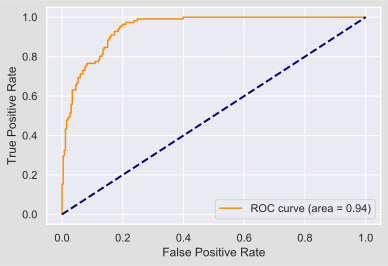

In [106]:
#ROC and AUC of ROC
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend();

This plot gives sense to the use of ROC AUC metric to evaluate our models. It takes into consideration true positive rate (TPR) and false positive rate (FPR) thus penalizes misclassification in a way more coherent way than accuracy.  
The curve is near the top left corner, meaning that FPR is low and TPR high which is what we want.

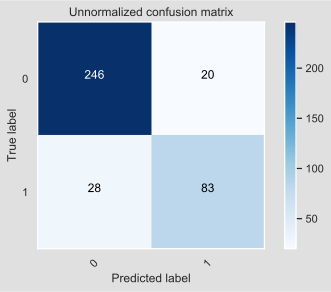

In [99]:
#Confusion matrix
plot_confusion_matrix(labels, y_test)

The confusion matrix gives the same information than the previous plot.

## Conclusion

Overall, compared to classical models and state-of-the-art models, we have tested 2 aggregation models which helped improve performances. We could have performed hyperparameters tuning (e.g. with grid search) to increase performances, especially for neural networks.  
Concerning the target, we could have chosen another drug to analyze. We could have specifically chosen an unbalanced target, using resampling methods (over- and under-sampling) to solve the problem.